# 소개

1. URL
 - https://www.kaggle.com/c/titanic (Titanic: Machine Learning from Disaster)

2. 설명
 - 인공지능 기법을 사용하여 타이타닉 난파선에서 살아남은 승객을 예측하는 모델을 만듭니다.
 - 생존과 관련된 여러 요소가 있지만 일부 사람들은 다른 사람들보다 생존 할 가능성이 더 높은 것으로 보입니다.
 - 이 대회에서 우리는 “어떤 종류의 사람들이 살아남을 가능성이 더 높습니까?”라는 질문에 대답하는 예측 모델을 구축하여야 합니다

3. 평가방법
 - 승객 데이터 (예 : 이름, 연령, 성별, 사회 경제적 클래스 등) 사용하여 승객이 타이타닉 침몰에서 살아남았는지 예측하는 것이 임무입니다.
 - 테스트 세트의 각각에 대해 변수의 0 또는 1 값을 예측해야 합니다.

# 데이터

- survival - 생존여부 ( 0 = No, 1 = Yes )
- pclass - 티켓 등급 ( 1 = 1st, 2 = 2nd, 3 = 3rd )
- sex - 성별
- Age - 나이
- sibsp - 타이타닉에 승선한 형제자매 또는 배우자의 수
- parch - 타이타닉에 승선한 부모 - 자식의 수
- ticket - 티켓 번호
- fare - 승선 요금
- cabin - 선실 번호
- embarked - 승선 항구 이름 ( C = Cherbourg, Q = Queenstown, S = Southampton )

# 데이터 전처리

## 데이터프레임 로드하기

[ 설명 ] pandas의 read_csv 메소드를 호출하여 train.csv 파일을 읽어오면, dataframe 형태로 반환합니다.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

df1 = pd.read_csv('train.csv', encoding='cp949')

In [5]:
print(df1)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

## 데이터셋 결측치 확인

[ 설명 ] pandas의 isnull(), sum() 메소드를 호출하여 dataframe에 컬럼별 결측치 개수를 구한다. ( 0 -> 결측치 없음, 상수 -> 총 결측치 개수)

In [7]:
num_missing_values = df1.isnull().sum()
print(num_missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## 학습 데이터셋 상위 5개 항목 출력

[ 설명 ] pandas의 head(n) 메소드를 사용하여 n개의 레코드를 출력한다.

In [10]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 학습 데이터셋 데이터 분포 확인

[ 설명 ] pandas의 describe메소드를 사용하여 레코드의 총 개수, 평균, 최소값, 최대값 등을 출력한다.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 데이터 타입 확인

[ 설명 ] pandas의 dtypes 메소드를 사용하여 dataframe내의 컬럼 별 데이터 타입을 확인한다.

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 'Cabin', 'Embarked' 데이터 확인

[ 설명 ] pandas의 unique 메소드를 사용하여 Series에 어떤 단일값들이 있는지 확인한다.

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']
['S' 'C' 'Q' nan]


## 생존한 사람과 사망한 사람의 수 확인

[ 설명 ] pandas의 sum() 메서드 사용하여 Survival컬럼 값의 합으로 생존자의 수를 구하고 train의 전체 레코드 수에서 survival의 값을 빼어 사망한 사람의 수를 구한다.

## 승객 클래스별 탑승객 분포 확인

[ 설명 ] pandas의 value_count()메소드를 사용하여 승객의 지위(Pclass)별 분포를 확인한다.

3    491
1    216
2    184
Name: Pclass, dtype: int64

## 성별 탑승객 분포 확인

[ 설명 ] pandas의 value_count()메소드를 사용하여 승객의 성(Sex)별 분포를 확인한다.

male      577
female    314
Name: Sex, dtype: int64

## 'Embarked' 필드 결측치는 값이 가장 많은 'S'로 할당

[ 설명 ] pandas의 fillna()함수를 사용하여 결측치 값을 'S'로 바꾼다.

## 'Age' 필드 결측치는 중앙값으로 할당

[ 설명 ] pandas의 median()메소드로 'Age'필드의 중간값을 가져와서 fillna()함수를 사용하여 'Age'필드의 중간값으로 'Age'필드의 결측치를 바꾼다.

## 'Name' 필드에서 신분을 나타내는 단어를 뽑아 'Title' 필드에 할당

[ 설명 ] pandas의 extract()메소드에 인자값으로 정규식을 전달해주면 해당되는 문자열을 추출해낸다.

## 'Title' 필드 카테고리를 6개 항목으로 변경

[ 설명 ] replace()메소를 사용하여 첫번째 인자에 해당하는 문자열을 두 번째 인자 문자열로 치환한다.
 - 'Capt', 'Col', 'Major', 'Dr', 'Rev' => Officer
 - 'Jonkheer', 'Master' => Master
 - 'Don', 'Sir', 'the Countess', 'Lady', 'Dona' => Royalty
 - 'Mme', 'Ms', 'Mrs' => Mrs
 - 'Mlle', 'Miss' => Miss
 - 'Mr' => Mr

## 변수 y를 선언해서 학습할 목표변수인 'Survived' 데이터 할당

[ 설명 ] 변수 y에 Survived컬럼을 할당한다.

## 나이('Age') 필드를 그룹핑하여 'AgeGroup' 필드를 생성하여 할당

[ 설명 ] AgeGroup컬럼의 값들을 bin에 맞게 잘라서 각 bin을 group_names와 1대1 매칭시켜 분류한다.
- 0~18세: Baby
- 19~25세: Youth
- 26~35세: YoungAdult
- 36~60세: MiddleAged
- 61~100세: Senior 

YoungAdult    373
MiddleAged    195
Youth         162
Baby          139
Senior         22
Name: AgeGroup, dtype: int64

# 데이터 시각화

## 라이브러리 호출

[ 설명 ] matplotlib의 pyplot, seaborn을 import한다.

## 성별의 생존여부 데이터 분포 확인(barplot)

[ 설명 ] seaborn의 barplot메소드를 호출하여 X축에는 성별, Y축에는 생존비율로 각각 지정하여 성별 별 생존자 분포를 확인한다.

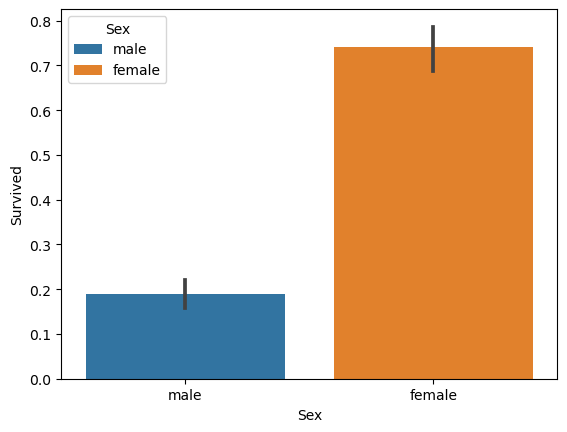

## 승객 클래스('Pclass')별 성별 생존여부 데이터 분포 확인(barplot)

[ 설명 ] seaborn의 barplot메소드를 호출하여 각 Pclass내의 성별 별 생존률 분포를 확인한다.

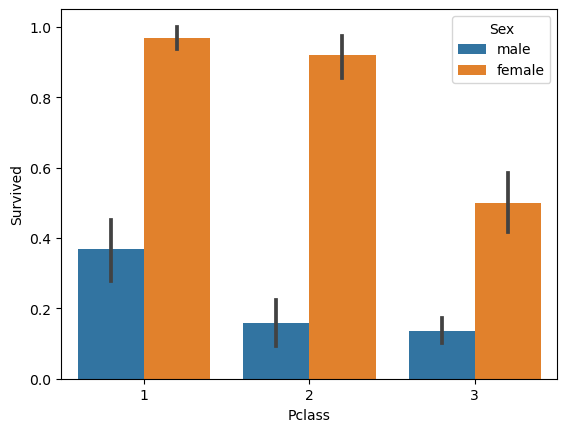

## 전체 변수의 correlation 히트맵 확인

[ 설명 ] seaborn의 heatmap메소드에 train데이터의 상관계수를 인자로 넘겨주면 train데이터의 전체 상관관계에 대한 히트맵을 반환한다.

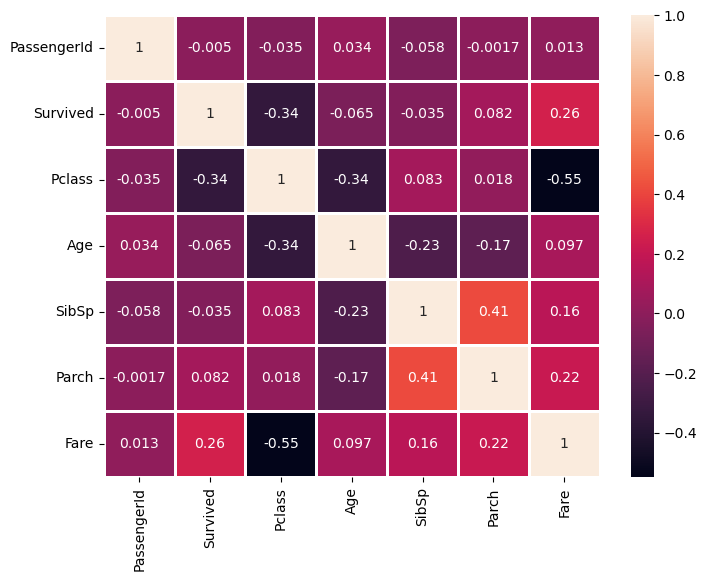

## 연령분포('AgeGroup')별 클래스별 생존여부 데이터 분포 확인

[ 설명 ] seaborn의 barplot메소드를 호출하여 각 AgeGroup 내의 성별 별 생존률 분포를 확인한다.

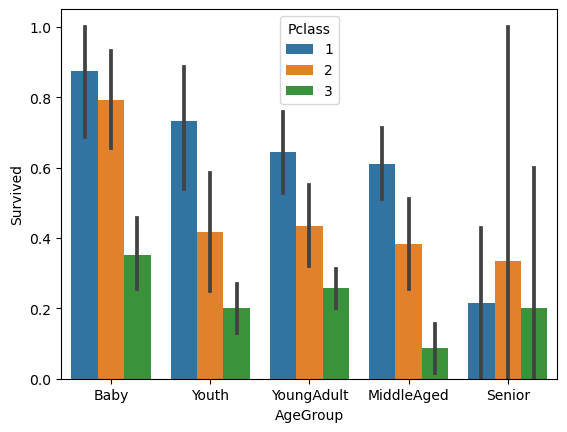

## 형제/자매('SibSp')별 클래스별 생존여부 확인

[ 설명 ] seaborn의 barplot메소드를 호출하여 각 형재/자매 수 컬럼 내의 성별 별 생존률 분포를 확인한다.

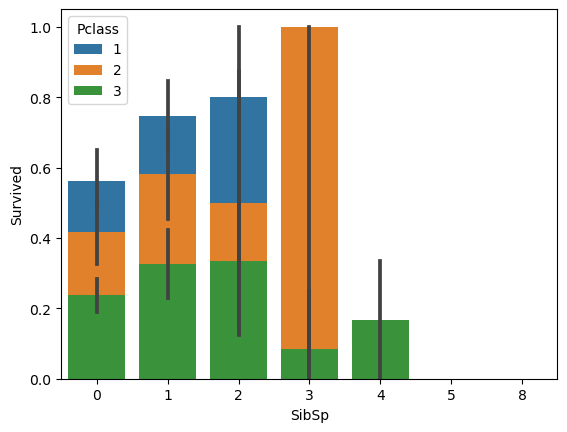

# 모델 생성

## 라이브러리 호출

[ 설명 ] scikit-learn의 LabelEncoder 모듈 import

## 학습 데이터 준비 (Name, Ticket, SibSp, Parch, Cabin 컬럼 삭제)

[ 설명 ] drop메소드를 호출하여 Name, Ticket, SibSp, Parch, Cabin컬럼을 데이터프레임에서 삭제한다.

## 모델링에 사용할 변수의 타입을 수치형으로 변환

[ 설명 ] 'Sex'컬럼값의 타입을 확인해보면 object타입인 걸 알 수 있다. LabelEncoder로 정수형 타입으로 바로 캐스팅이 불가능하기 때문에 우선 "String"타입으로 전환해준다. LabelEncoder객체를 label 인스턴스로 생성하여 특정 컬럼의 타입을 정수형으로 변환해줄 준비를 한다. 'Sex', 'Embarked', 'Title', 'AgeGroup' 네 개의 컬럼값들을 반복문을 통해 모두 정수형으로 변환해준다.

## 학습시킬 변수와 Label 분리

[ 설명 ] X_train과 Y_train에 학습시킬 변수와 Label변수를 각각 분리한다.

## Train Dataset과 Survived 컬럼과 다른 변수들 간의 상관관계 확인

[ 설명 ] corr()['컬럼명']을 호출하게 되면 해당 컬럼명과 다른 컬럼들 간의 상관관계를 리턴한다.

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex           -0.543351
Age           -0.064910
Fare           0.257307
Embarked      -0.167675
Title         -0.068432
AgeGroup      -0.101416
Name: Survived, dtype: float64

## Logistic regression 라이브러리 호출

[ 설명 ] Logistic Regression 모델을 사용하기 위해 해당 모델 모듈을 Import 하였으며 LogisticRegression 객체를 생성하였다.

## Test Dataset 로드

[ 설명 ] test dataset을 load한다.

## Test Dataset 결측치 확인 및 처리하기

[ 설명 ] test dataset의 Null값 유무를 확인한다.

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

[ 설명 ] 'Age'컬럼의 null값들을 Age컬럼의 중앙값으로 대체한다. 'Fare'컬럼의 null값들을 Fare컬럼의 평균으로 대체한다.

## Train 데이터셋 차원 맞추기

[ 설명 ] Train dataset과 동일한 컬럼들을 생성해준다. (Title, AgeGroup)

YoungAdult    175
MiddleAged     85
Youth          83
Baby           66
Senior          9
Name: AgeGroup, dtype: int64

[ 설명 ] Sex, Embarked, Title, AgeGroup LabelEncoder 적용

[ 설명 ] Train dataset과 동일한 컬럼만 나두고 나머지 컬럼을 모두 Drop시킨다.

## Logistic Regression 모델을 통해 예측

[ 설명 ] lr.fit 함수를 통해 모델 학습

LogisticRegression()

[ 설명 ] 테스트 데이터 셋에 대한 예측을 수행

## Submission 파일 로드

[ 설명 ] gender_submission파일을 로드한다.

## Submission 데이터 프레임의 Survived 컬럼을 예측값으로 바꾸기

[ 설명 ] 예측값이 들어있는 pred변수를 submission의 Survived컬럼에 할당해준다.

## 예측값을 적용한 Gender Submission 파일 write

[ 설명 ] 예측값이 적용된 gender_submission파일을 적절한 디렉토리에 저장하여 채점을 진행한다.